In [8]:
import numpy as np
import mne
import matplotlib as plt

Extracting EDF parameters from C:\Users\Adrian\Desktop\Magisterka\Badania\22.05.2024\MM\Testdata.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3006463  =      0.000 ...  1468.000 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


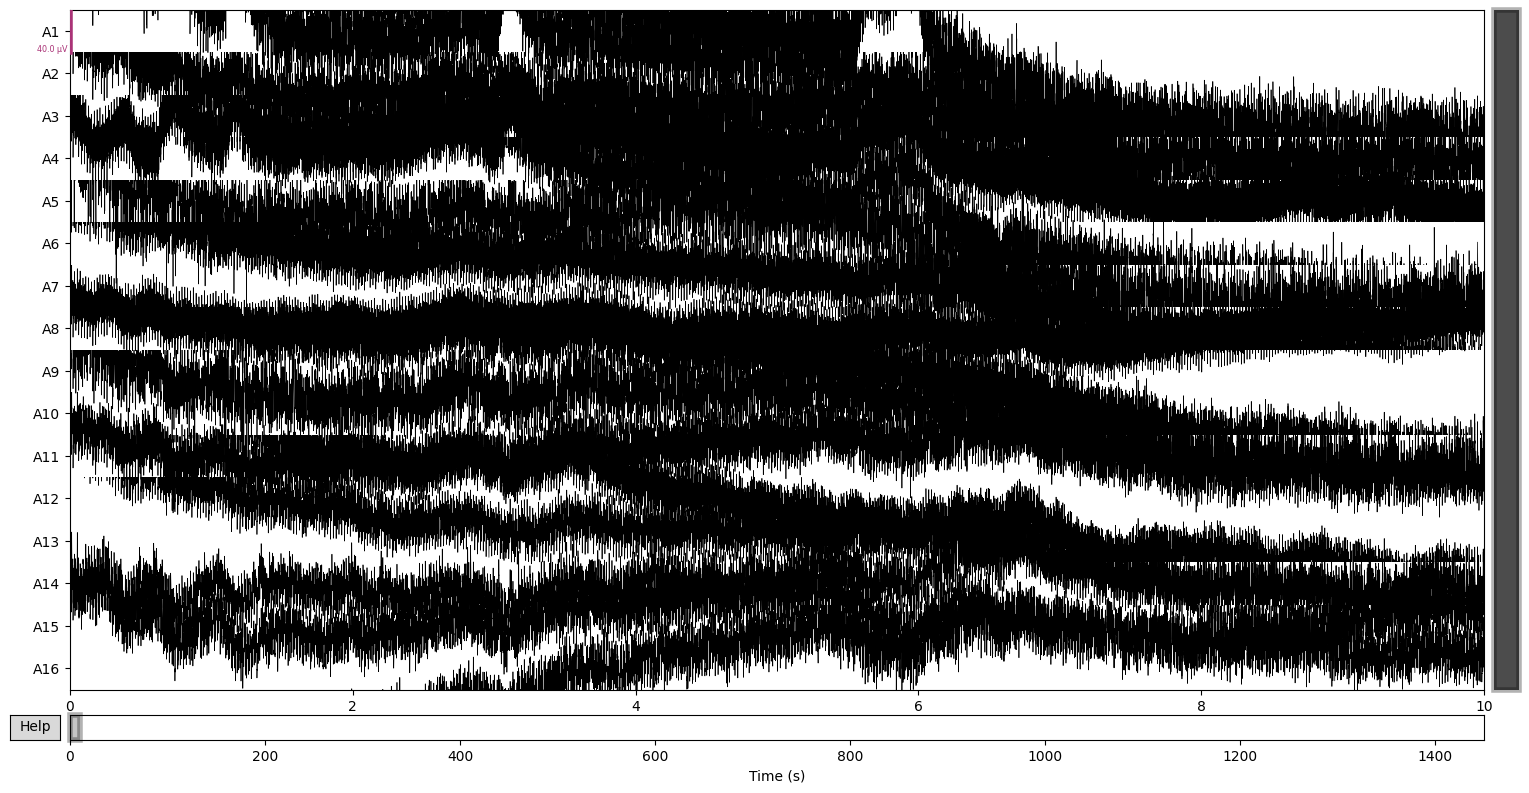

Effective window size : 1.000 (s)


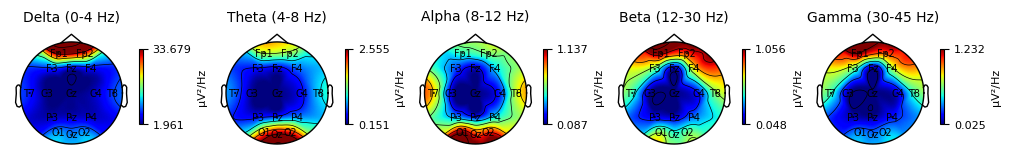

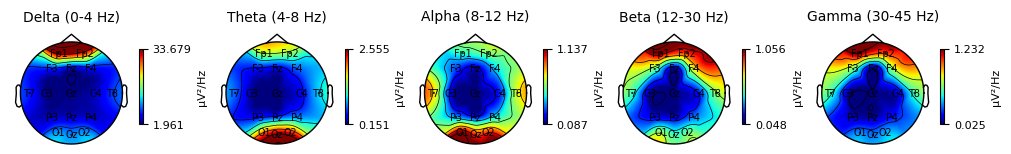

In [9]:

# Load EEG data from a file
raw = mne.io.read_raw_bdf('C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/MM/Testdata.bdf', preload=True)
# raw = mne.io.read_raw_bdf('experyment.bdf', preload=True)
raw.crop(tmin=12, tmax=1462).load_data()
# raw.plot_psd_topomap(ch_type='eeg',  # Specify channel type
#                      average='mean')  # Specify time window for averaging

# raw.describe()
raw.pick_channels(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
# Plot the raw EEG data
raw.plot(block=True)
# Creating channels dictionary
channels_dict = {'A1' : 'Fp1',
                 'A2' : 'Fp2',
                 'A3' : 'F4',
                 'A4' : 'Fz',
                 'A5' : 'F3',
                 'A6' : 'T7',
                 'A7' : 'C3',
                 'A8' : 'Cz',
                 'A9' : 'C4',
                 'A10' : 'T8',
                 'A11' : 'P4',
                 'A12' : 'Pz',
                 'A13' : 'P3',
                 'A14' : 'O1',
                 'A15' : 'Oz',
                 'A16' : 'O2',
                 }

# Renaming channels to match our setup
raw.rename_channels(mapping=channels_dict) 
pos = raw.set_montage('biosemi16')  
# raw.info['dig']  
raw.info['ch_names']
# raw.plot_sensors(show_names=True)
spectrum = raw.compute_psd()
spectrum.plot_topomap(cmap=('jet','True'), show_names=True)




In [26]:
raw.info

Measurement date,"May 22, 2024 11:32:31 GMT"
Experimenter,Unknown
Participant,
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


In [6]:
raw.info()

NameError: name 'raw' is not defined

In [6]:
# Check the channel names and remove any unnecessary channels from the raw object
raw.pick_channels(['Fp1', 'Fp2', 'F4', 'Fz', 'F3', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P4', 'Pz', 'P3', 'O1', 'Oz', 'O2'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Measurement date,"May 22, 2024 10:34:40 GMT"
Experimenter,Unknown
Participant,
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


In [29]:
average_signal = np.mean(raw._data, axis=1)

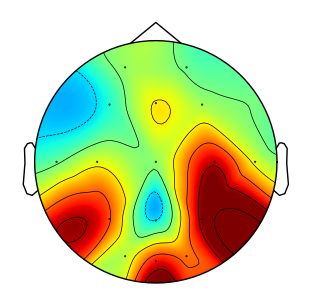

In [30]:
im, _ = mne.viz.plot_topomap(average_signal, raw.info, ch_type='eeg', sensors=True, cmap='jet', res=64, size=3)

In [17]:
print(raw._data.shape)

(16, 4057088)


# to samo tylko z automatycznym odczytem przedzialow czasowych

# Dla przedziałów takich jak w wozku

In [6]:
import re
from datetime import datetime, timedelta

# Path to the log file
log_file_path = 'C:/Users/Adrian/Desktop/logi/2024-04-25_10-17-09.log'

# Read the content of the log file
with open(log_file_path, 'r') as file:
    log_file_content = file.read()

# Compile a regular expression to find the relevant lines
pattern = re.compile(r'(\d{4}-\d{2}-\d{2} (\d{2}:\d{2}:\d{2})) - CRITICAL - Pressed Key\.(f1|f6|f7)')

# Find all matches in the log file content
matches = pattern.findall(log_file_content)

# Initialize dictionaries to hold start and stop times
start_times = {}
flag_intervals = []
base_time = None

# Function to convert time to seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Process the matches
for match in matches:
    full_timestamp, time_only, flag = match
    if flag == 'f1' and base_time is None:
        base_time = time_to_seconds(time_only)
        start_times[flag] = 0
        continue
    
    current_time_in_seconds = time_to_seconds(time_only)
    relative_time = current_time_in_seconds - base_time
    
    if flag not in start_times:
        start_times[flag] = relative_time
    else:
        stop_time = relative_time
        flag_intervals.append((start_times[flag], stop_time, flag))
        del start_times[flag]

# Output the list of tuples
for interval in flag_intervals:
    print(interval)


(19, 35, 'f6')
(47, 64, 'f7')
(70, 99, 'f6')
(103, 122, 'f7')
(129, 155, 'f7')
(161, 184, 'f6')
(192, 214, 'f6')
(220, 229, 'f7')
(234, 307, 'f7')
(320, 328, 'f6')
(0, 331, 'f1')


# Test dla przedziałów z pierwszego testu TK,MM,EL

In [5]:
import re
from datetime import datetime

def extract_flag_intervals(log_file):
    with open(log_file, 'r') as file:
        lines = file.readlines()

    flag_intervals = []
    current_flag = None
    start_time = None
    f1_base_time = None
    last_event_time = None

    flag_mapping = {
        "Key.f1": "F1",
        "Key.f3": "F3",
        "Key.f4": "F4",
        "Key.f6": "F6",
        "Key.f7": "F7",
        "Key.f8": "F8"
    }

    time_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')
    flag_pattern = re.compile(r'CRITICAL - Pressed (\w+\.\w+)')

    def time_to_seconds(time_str):
        time_format = "%Y-%m-%d %H:%M:%S"
        dt = datetime.strptime(time_str, time_format)
        if f1_base_time is None:
            return 0
        delta = dt - f1_base_time
        return delta.total_seconds()

    for line in lines:
        time_match = time_pattern.search(line)
        flag_match = flag_pattern.search(line)

        if time_match and flag_match:
            timestamp = time_match.group(1)
            flag_key = flag_match.group(1)

            if flag_key in flag_mapping:
                dt_timestamp = datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S")

                if flag_mapping[flag_key] == "F1" and f1_base_time is None:
                    f1_base_time = dt_timestamp

                if current_flag is None:
                    current_flag = flag_mapping[flag_key]
                    start_time = timestamp
                else:
                    end_flag = flag_mapping[flag_key]
                    if not ((current_flag == "F3" and end_flag == "F4") or 
                            (current_flag == "F7" and end_flag == "F8")):
                        flag_intervals.append((time_to_seconds(start_time), time_to_seconds(timestamp), current_flag, end_flag))
                    current_flag = flag_mapping[flag_key]
                    start_time = timestamp

                last_event_time = dt_timestamp

    total_duration_seconds = None
    if f1_base_time and last_event_time:
        total_duration_seconds = int((last_event_time - f1_base_time).total_seconds())

    return flag_intervals, f1_base_time, total_duration_seconds

# Main function to execute the script
if __name__ == "__main__":
    log_file = 'C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/MM/2024-05-22_11-19-40.log'
    flag_intervals, f1_base_time, total_duration_seconds = extract_flag_intervals(log_file)
    
    for interval in flag_intervals:
        print(interval)
    
    if f1_base_time:
        f1_starting_time = f1_base_time.strftime('%H:%M:%S')
        print(f"F1 flag starting time: {f1_starting_time}")
    
    if total_duration_seconds is not None:
        print(f"Total duration from F1 start to last event: {total_duration_seconds} seconds")


(0.0, 155.0, 'F1', 'F3')
(178.0, 265.0, 'F4', 'F6')
(265.0, 397.0, 'F6', 'F6')
(397.0, 494.0, 'F6', 'F6')
(494.0, 613.0, 'F6', 'F6')
(613.0, 703.0, 'F6', 'F6')
(703.0, 814.0, 'F6', 'F6')
(814.0, 815.0, 'F6', 'F7')
(826.0, 1282.0, 'F8', 'F6')
(1282.0, 1450.0, 'F6', 'F1')
F1 flag starting time: 11:32:43
Total duration from F1 start to last event: 1450 seconds


In [ ]:
import numpy as np
import mne
import matplotlib as plt

# Load EEG data from a file (.bdf)
bdf_file_path = 'C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/MM/Testdata.bdf'
raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)
# raw.load_data()
raw.crop(tmin=12, tmax=1462).load_data()
# raw.describe()
raw.pick_channels(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
# Channel names dict to match predefined layout
channels_dict = {'A1' : 'Fp1',
                 'A2' : 'Fp2',
                 'A3' : 'F4',
                 'A4' : 'Fz',
                 'A5' : 'F3',
                 'A6' : 'T7',
                 'A7' : 'C3',
                 'A8' : 'Cz',
                 'A9' : 'C4',
                 'A10' : 'T8',
                 'A11' : 'P4',
                 'A12' : 'Pz',
                 'A13' : 'P3',
                 'A14' : 'O1',
                 'A15' : 'Oz',
                 'A16' : 'O2',
                 }

# Renaming channels
raw.rename_channels(mapping=channels_dict) 
raw.set_montage('biosemi16')  
# raw.info['dig']  
raw.info['ch_names']
# raw.plot_sensors(show_names=True)

plt.rcParams.update({'font.size': 10})

for interval in flag_intervals:
    tmin = interval[0]
    tmax = interval[1]
    raw_copy = raw.copy()
    przedzial = raw_copy
    przedzial = przedzial.crop(tmin=tmin, tmax=tmax)
    przedzial_spectrum = przedzial.compute_psd()
    img = przedzial_spectrum.plot_topomap(cmap=('jet','True'), show_names=True)
    img.set_figwidth(80)
    img.set_figheight(50)
    img.savefig(f'part_{tmin}_{tmax}_{interval[2]}.png')

In [24]:
from datetime import datetime, timedelta

# Function to convert time string to seconds since start of the day
def time_to_seconds(time_str):
    t = datetime.strptime(time_str, '%H:%M:%S')
    return t.hour * 3600 + t.minute * 60 + t.second

# Function to convert seconds since start of the day to time string
def seconds_to_time(seconds):
    return str(timedelta(seconds=seconds))

# Provided log details for log1
log1_start_time = f1_starting_time
log1_duration = total_duration_seconds  # in seconds
log1_start_seconds = time_to_seconds(log1_start_time)
log1_end_seconds = log1_start_seconds + log1_duration

# Provided log details for log2
bdf_start_time = '11:32:40'
bdf_duration = 1468  # in seconds
bdf_start_seconds = time_to_seconds(bdf_start_time)
bdf_end_seconds = bdf_start_seconds + bdf_duration

# Initialize variables to hold the synchronized times
sync_start_seconds = 0
sync_end_seconds = 0
cut_from_start = 0
cut_from_end = 0

# Determine the appropriate case and adjust times accordingly
if bdf_start_seconds <= log1_start_seconds:
    if bdf_end_seconds <= log1_end_seconds:
        # log2 starts before or at the same time and ends before or at the same time
        sync_start_seconds = log1_start_seconds
        sync_end_seconds = log1_end_seconds
        cut_from_start = log1_start_seconds - bdf_start_seconds
        cut_from_end = bdf_end_seconds - log1_end_seconds
    else:
        # log2 starts before or at the same time and ends after log1
        sync_start_seconds = log1_start_seconds
        sync_end_seconds = log1_end_seconds
        cut_from_start = log1_start_seconds - bdf_start_seconds
        cut_from_end = bdf_end_seconds - log1_end_seconds
else:
    if bdf_end_seconds >= log1_end_seconds:
        # log2 starts after or at the same time and ends after or at the same time
        sync_start_seconds = bdf_start_seconds
        sync_end_seconds = bdf_start_seconds + log1_duration
        cut_from_end = bdf_end_seconds - sync_end_seconds
    else:
        # log2 starts after or at the same time and ends before log1
        sync_start_seconds = bdf_start_seconds
        sync_end_seconds = bdf_start_seconds + log1_duration
        cut_from_end = bdf_end_seconds - sync_end_seconds

# Convert synchronized times back to time strings
sync_start_time = seconds_to_time(sync_start_seconds)
sync_end_time = seconds_to_time(sync_end_seconds)

print(f"Synchronized start time: {sync_start_time}")
print(f"Synchronized end time: {sync_end_time}")
print(f"Cut {cut_from_start} seconds from the start of the second log.")
print(f"Cut {cut_from_end} seconds from the end of the second log.")


Synchronized start time: 11:32:43
Synchronized end time: 11:56:53
Cut 3 seconds from the start of the second log.
Cut 15 seconds from the end of the second log.
